## Imports

In [ ]:
# offizielle libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# selbstgeschrieben
import file_organizer as fo
from func import get_norm_cm
from func import ticks_handle

## T1 aus Periode

Meas H: Daten von Tag 1

In [ ]:
# load file list
path = 'data_day_one'
file_list = fo.load_file_list(path)
selection = (fo.select_files(file_list,'meas','H'))
# load data from files
dataFrameList = fo.load_files(selection)
data = fo.df_combine(dataFrameList)
del(data['iout'])

In [ ]:
# load file list
path = 'data_day_one'
file_list = fo.load_file_list(path)
selection = (fo.select_files(file_list,'meas','E'))
data = fo.load_files(selection)
data = fo.df_combine(data)
del(data['iout'])
label = list(data.columns)
label.remove('time')
P = [meas.P for meas in selection]
data['time'] = data['time'] * 1000

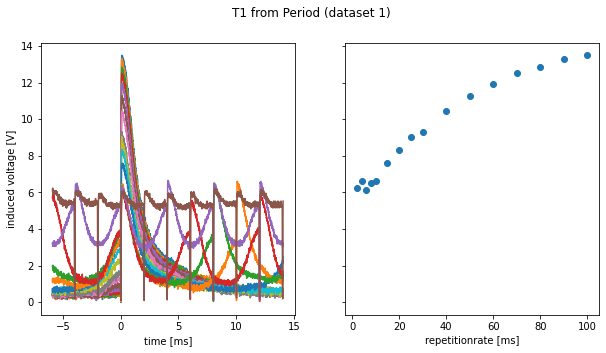

In [ ]:
fig,(ax,bx)=plt.subplots(1,2, sharey=True, figsize=(10,5))
# ran = [0,3,5,6,7,9]
ran = range(len(label))
for i in ran:
    data.plot(x='time', y=label[i],ax=ax,label=P[i] )
# ax.set_xlim(-2,15)
ax.legend(title='P [ms]').remove()
ax.set_xlabel('time [ms]')
ax.set_ylabel('induced voltage [V]')

maximum = [data[l].max() for l in label]
period = [s.P for s in selection]
bx.scatter(period, maximum)
bx.set_xlabel('repetitionrate [ms]')
fig.suptitle('T1 from Period (dataset 1)')
plt.show()

Meas K:

Daten von Tag 2

In [ ]:
# Neuer Versuch
path = "data_day_two"
file_list = fo.load_file_list(path)
selection = fo.select_files(file_list, "meas", "K")
data = fo.load_files(selection)
data = fo.df_combine(data)
del data["iout"]
data["time"] = data["time"] * 1000
labels = list(data.columns)
labels.remove("time")
P = [meas.P for meas in selection]
M = [data[l].max() for l in labels]

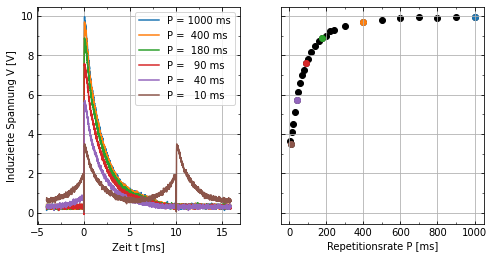

In [ ]:
split=False
if not split:
    fig, (ax, bx) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
else:
    fig1, (ax) = plt.subplots(figsize=(4, 4))
    fig2, (bx) = plt.subplots(figsize=(4, 4))

inds = [0, 6, 11, 16, 21, 25]
data.plot(x="time",y=[labels[i] for i in inds], ax=ax,
          label=[f'P = {P[i]:4.0f} ms' for i in inds])
ax.set_xlabel("Zeit t [ms]")
ax.set_ylabel("Induzierte Spannung V [V]")
ax.legend()

bx.scatter(P, M, color='black')
for idx in inds:
    bx.scatter(P[idx], M[idx])
bx.set_xlabel("Repetitionsrate P [ms]")
bx.set_ylabel("Induzierte Spannung V [V]")
bx.set_ylim(*ax.get_ylim())

ax.grid()
bx.grid()
ticks_handle(ax, which='both')
ticks_handle(bx, which='both')

if not split:
    fig.savefig('IMAGES/lmo_t1_periode.png')
else:
    fig1.savefig('IMAGES/lmo_t1_periode_a.png')
    fig2.savefig('IMAGES/lmo_t1_periode_b.png')
plt.show()


In [ ]:
print(f'{np.max(M)=}')
print(f'{M[6]=}')
M[7]/np.max(M)
for p, m in zip(P, M):
    print(f'{p=}, {m/np.max(M)}')

np.max(M)=9.955888167
M[6]=9.694179627
p=1000, 1.0
p=900, 1.0
p=800, 0.9940642687012216
p=700, 0.9991520383858887
p=600, 0.9923683454729991
p=500, 0.9847366910464413
p=400, 0.9737131900629957
p=300, 0.9525141498106584
p=240, 0.9321630711724326
p=220, 0.925379378259543
p=200, 0.9041803380072059
p=180, 0.8914609138959807
p=160, 0.8770455664560901
p=140, 0.8507587565190858
p=120, 0.8219280617397479
p=100, 0.7829218276915183
p=90, 0.7617227874391812
p=80, 0.7286522845892871
p=70, 0.7023654746522827
p=60, 0.6608153557617197
p=50, 0.6133295055723781
p=40, 0.5726273482959263
p=30, 0.5115741122808054
p=20, 0.4513688379802389
p=15, 0.4098187189892328
p=10, 0.3496134446886661
p=5, 0.3674206384845584


## T1 aus Echo-Methode

Daten: Tag 1, meas == H, Tau ungeüngedner Bereich

In [ ]:
path = 'data_day_one'
file_list = fo.load_file_list(path)
selection = (fo.select_files(file_list,'meas','H'))

data = fo.load_files(selection)
data = fo.df_combine(data)
data['time'] = data['time'] * 1000

# data.info()

del(data['iout'])
del(data['qout'])
# data.plot(x='time')
label = list(data.columns)
label.remove('time')

tau = [meas.tau for meas in selection]
mi = [data[l].idxmax() for l in label]
md = [data.loc[i, l] for i,l in zip(mi, label)]

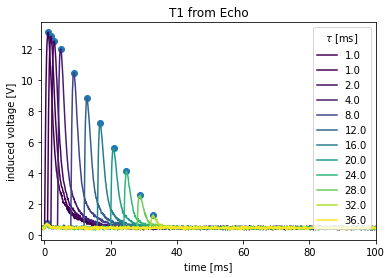

In [ ]:
fig,ax=plt.subplots()
colormap, m, n = get_norm_cm('viridis', min(tau), max(tau))
# ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
# cb1 = mpl.colorbar.ColorbarBase(ax=ax2, cmap=m,norm=n)
# ax2.set_ylabel('$\\tau$  [ms]')

for l, t in zip(label, tau):
    data.plot(x='time', y=l, ax=ax, label=t, color = colormap(t))
ax.scatter(data['time'][mi], md)
ax.set_xlim(-1,100)
ax.set_title('T1 from Echo')
ax.set_xlabel('time [ms]')
ax.set_ylabel('induced voltage [V]')

ax.legend(title='$\\tau$ [ms]')

Data day two: meas == L

In [ ]:
path = 'data_day_two'
file_list = fo.load_file_list(path)
selection = (fo.select_files(file_list,'meas','L'))

# print(selection)
#config = [cp.load_param(path + '/' + d.filename.replace('.csv', '.txt')) for d in selection]
#delays = [c.horizontal.get_time_delay() for c in config]

tau = np.array([s.tau for s in selection])

data = fo.load_files(selection)
# data = fo.df_combine(data)

# del(data['iout'])
# label = list(data.columns)
# label.remove('time')

idx = [d['signal'].idxmax() for d in data]
msig = [d.loc[i, 'signal'] for i,d in zip(idx, data)]
mtim = [d.loc[i, 'time'] for i,d in zip(idx, data)]

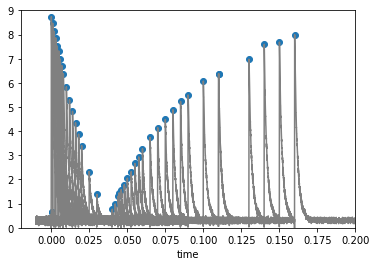

In [ ]:

fig,ax = plt.subplots()
# look at index 18, 33/34, 38, 44, they dont match
i = 43
ran = slice(0,43)
for d, P in zip(data[ran], tau[ran]):
    d.plot(x='time', y='signal', ax=ax, label=P, color='gray')
    pass
ax.set_xlim(-0.02, 0.2)
ax.set_ylim(-0,9)

ax.scatter(mtim[ran], msig[ran])
# ax.scatter(tau[ran]*1e-3, msig[ran], marker='x')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend().remove()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c333ff75-d5d2-432c-b928-cf45631da0c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>